In [ ]:
!pip install ts2vg

In [ ]:
!pip install igraph

In [ ]:
!pip install pycairo
!pip install cairocffi

In [ ]:
#importing necessary libraries
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ts2vg import NaturalVG
from ts2vg import HorizontalVG

##Task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df_main is the dataframe created for the final output of task 1
df_main = pd.DataFrame(columns=['Method','Subject','Accelerometer axis','Body Position','Average Degree','Network Diameter','Average Path Length','Activity'])

In [ ]:
#FDA_Project2 folder is google drive has subjects folders in which we have all the accelerometer readings placed at different positions
subjects_data_folder_main = r'/content/drive/MyDrive/FDA_Project2'
os.chdir(subjects_data_folder_main)     #changing directory to project2 folder
subjectsfolder=os.listdir()
print(subjectsfolder)

['subject9', 'subject3', 'subject10', 'subject4', 'subject5', 'subject8', 'subject6', 'subject7', 'subject2', 'subject1', 'subject11', 'subject13', 'subject15', 'subject12', 'subject14']


In [ ]:
'''
this function takes a list of accelerometer readings in one direction (axis) of one subject where the accelerometer is placed at one body part and creates a NVG.
It calculates the average degree, diameter and average path length and finally appends as a row to df_main.
'''
def nvg(datalist, subjectnumber, axis, bodyposition, activity):
  g = NaturalVG()
  g.build(datalist)
  ig_g = g.as_igraph()
  nvg_row = ['NVG', subjectnumber, axis, bodyposition]
  nvg_row.append(np.mean(ig_g.degree()))
  nvg_row.append(ig_g.diameter())
  nvg_row.append(ig_g.average_path_length())
  nvg_row.append(activity)
  df_main.loc[len(df_main.index)] = nvg_row

In [ ]:
'''
this function takes a list of accelerometer readings in one direction (axis) of one subject where the accelerometer is placed at one body part and creates a HVG.
It calculates the average degree, diameter and average path length and finally appends as a row to df_main.
'''
def hvg(datalist, subjectnumber, axis, bodyposition, activity):
  g = HorizontalVG()
  g.build(datalist)
  ig_g = g.as_igraph()
  hvg_row = ['HVG', subjectnumber, axis, bodyposition]
  hvg_row.append(np.mean(ig_g.degree()))
  hvg_row.append(ig_g.diameter())
  hvg_row.append(ig_g.average_path_length())
  hvg_row.append(activity)
  df_main.loc[len(df_main.index)] = hvg_row

In [ ]:
'''
This block of code, iterates over each subject folder, then iterates over each of its files, extracts the subject number,
body position of the accelerometer, activity and then creates lists for each x, y, and z axis and then calls nvg and hvg functions
passing all the required parameters. 
'''
for subjectfolder in subjectsfolder:  #iterate over each subject
    files=[]
    for file in os.listdir(subjectfolder):
        files.append(file)                 #appending all accelerometer reading files of each subject to files[]
    axes = ['attr_x', 'attr_y', 'attr_z']   
    for file in files:
        df = pd.read_csv(subjects_data_folder_main+'/'+subjectfolder+'/'+str(file))
        subjectnumber = subjectfolder[7:]     #extract subject number from the folder names. ex: 7 from 'subject7'
        bodyposition = str(file).split('_')[2][:-4]    #extracting the position of accelerometer on the body
        activity = str(file).split('_')[1]    #extract the activity name
        for axis in axes:       #iterating over all axes
          datalist = list(df.loc[np.r_[1000:2025], axis])     #creating datalist with 1024 readings to pass to nvg and hvg functions
          nvg(datalist, subjectnumber, axis, bodyposition, activity)      
          hvg(datalist, subjectnumber, axis, bodyposition, activity)      
          
df_main  

,Method,Subject,Accelerometer axis,Body Position,Average Degree,Network Diameter,Average Path Length,Activity
0,NVG,9,attr_x,chest,10.025366,11,4.791395,climbingdown
1,HVG,9,attr_x,chest,3.955122,26,11.025682,climbingdown
2,NVG,9,attr_y,chest,15.619512,19,7.299933,climbingdown
3,HVG,9,attr_y,chest,3.959024,33,14.644217,climbingdown
4,NVG,9,attr_z,chest,8.772683,11,4.645869,climbingdown
...,...,...,...,...,...,...,...,...
5023,HVG,14,attr_x,waist,3.898537,54,21.575274,climbingdown
5024,NVG,14,attr_y,waist,8.200976,10,4.751526,climbingdown
5025,HVG,14,attr_y,waist,3.978537,23,9.775539,climbingdown
5026,NVG,14,attr_z,waist,8.513171,9,5.099577,climbingdown


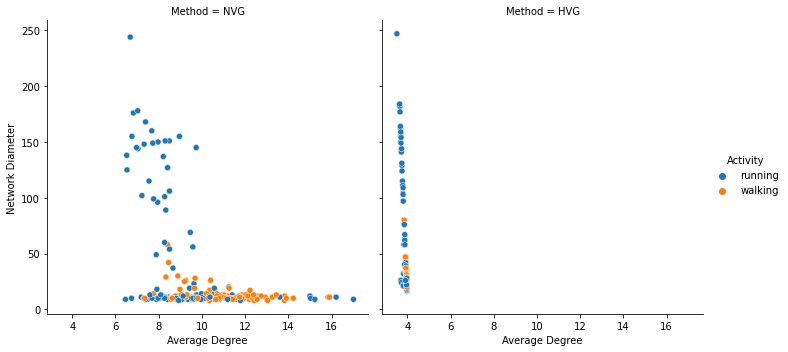

In [ ]:
#Scatter Plot for walking vs running accelerometer readings on x axis
walking_running_df = df_main[(df_main['Activity']=='running') | (df_main['Activity']=='walking')]
walking_running_x= walking_running_df[walking_running_df['Accelerometer axis']=='attr_x']
sns.relplot(data=walking_running_x,x='Average Degree',y='Network Diameter',hue='Activity',col='Method')
plt.show()

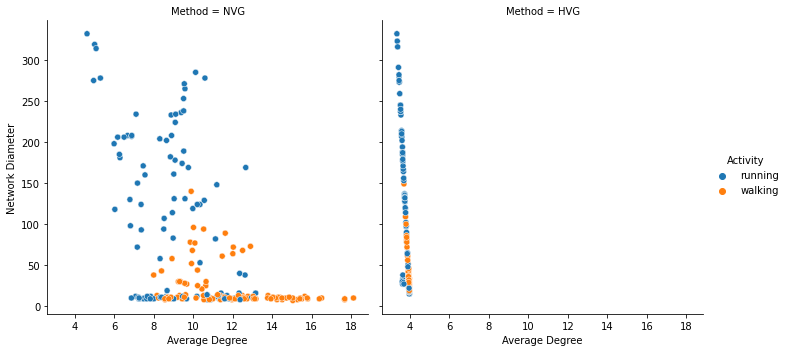

In [ ]:
#Scatter Plot for walking vs running accelerometer readings on y axis
walking_running_y= walking_running_df[walking_running_df['Accelerometer axis']=='attr_y']
sns.relplot(data=walking_running_y,x='Average Degree',y='Network Diameter',hue='Activity',col='Method')
plt.show()

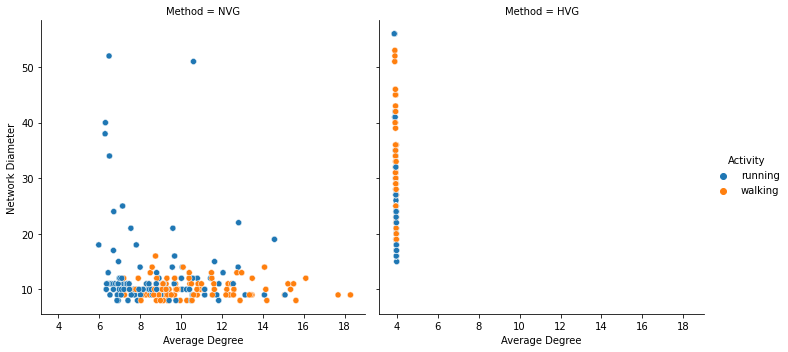

In [ ]:
#Scatter Plot for walking vs running accelerometer readings on z axis
walking_running_z= walking_running_df[walking_running_df['Accelerometer axis']=='attr_z']
sns.relplot(data=walking_running_z,x='Average Degree',y='Network Diameter',hue='Activity',col='Method')
plt.show()

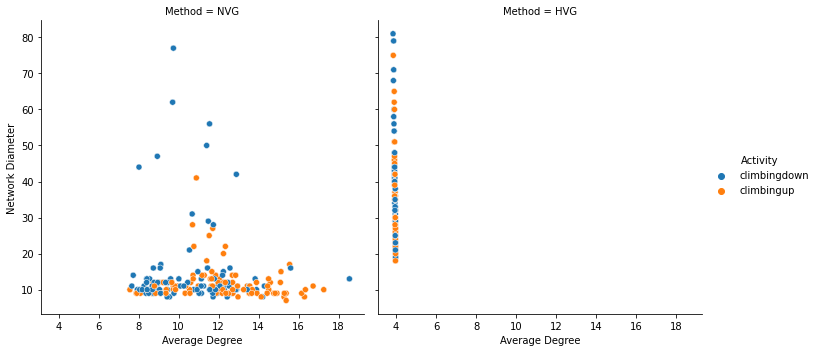

In [ ]:
#Scatter Plot for climbing up vs climbing down accelerometer readings on x axis
climbing_updown_df = df_main[(df_main['Activity']=='climbingup') | (df_main['Activity']=='climbingdown')]
climbing_updown_x= climbing_updown_df[climbing_updown_df['Accelerometer axis']=='attr_x']
sns.relplot(data=climbing_updown_x,x='Average Degree',y='Network Diameter',hue='Activity',col='Method')
plt.show()

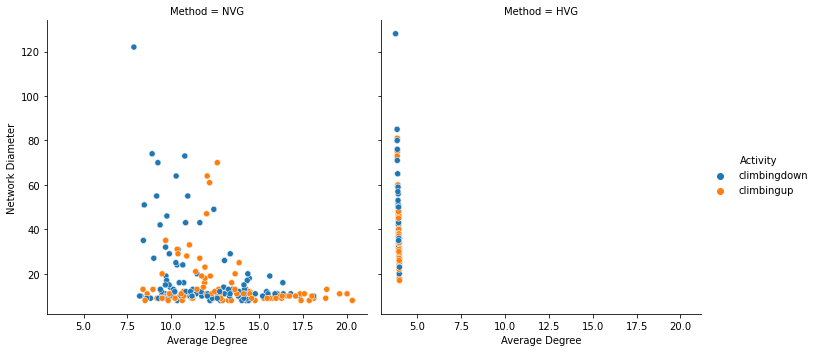

In [ ]:
#Scatter Plot for climbing up vs climbing down accelerometer readings on y axis
climbing_updown_y= climbing_updown_df[climbing_updown_df['Accelerometer axis']=='attr_y']
sns.relplot(data=climbing_updown_y,x='Average Degree',y='Network Diameter',hue='Activity',col='Method')
plt.show()

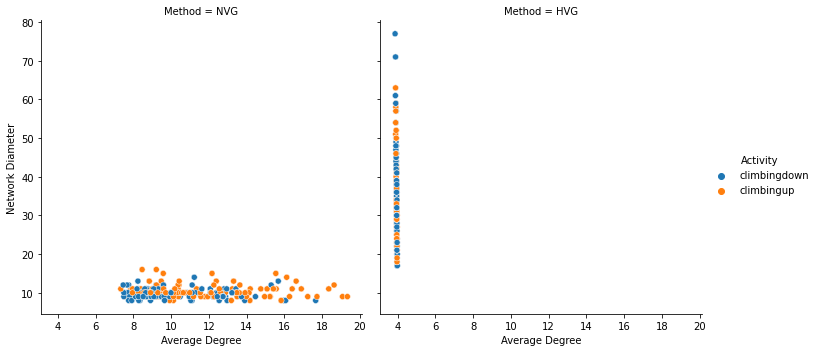

In [ ]:
#Scatter Plot for climbing up vs climbing down accelerometer readings on z axis
climbing_updown_z= climbing_updown_df[climbing_updown_df['Accelerometer axis']=='attr_z']
sns.relplot(data=climbing_updown_z,x='Average Degree',y='Network Diameter',hue='Activity',col='Method')
plt.show()

##Task 2

In [ ]:
'''
This block of code is taken from https://github.com/srk-srinivasan/Permutation-Entropy for calculating the permutaiton entropy
and complexity.
'''
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

In [ ]:
#df_main2 is the dataframe created for the final output of task 2
df_main2 = pd.DataFrame(columns=['Subject','Accelerometer Axis','Body Position','Signal Length','Dimension','Delay','Permutation Entropy','Complexity','Activity'])

In [ ]:
embedded_dim_arr = np.array([3,4,5,6])
embedded_delay = np.array([1,2,3])
axes = ['attr_x','attr_y','attr_z']
signal_len_arr = np.array([1024, 2048, 4096])

'''
iterating over each subject, accelerometer readings file placed at different body parts, axes, embedded dimensions, delays and signal lengths
then calculating the permutation entropy and complexity by passing all the parameters.
'''
for subjectfolder in subjectsfolder:
    files=[]
    files.extend(os.listdir(subjectfolder))
    for file in files:
        df = pd.read_csv(subjects_data_folder_main+'/'+subjectfolder+'/'+str(file))
        for axis in axes:
            for embdimension in embedded_dim_arr: 
                for embddelay in embedded_delay: 
                    for siglen in signal_len_arr: 
                        subjectnumber = subjectfolder[7:]
                        bodyposition = str(file).split('_')[2][:-4]
                        activity = str(file).split('_')[1]
                        P_entropy = p_entropy(ordinal_patterns(df.loc[1000:1001+siglen, axis], embdimension, embddelay))
                        Complexity = complexity(ordinal_patterns(df.loc[1000:1001+siglen, axis], embdimension, embddelay))

                        row = [subjectnumber, axis, bodyposition, siglen, embdimension, embddelay, P_entropy, Complexity, activity]
                        df_main2.loc[len(df_main2.index)] = row
                        
df_main2

,Subject,Accelerometer Axis,Body Position,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,9,attr_x,chest,1024,3,1,0.857646,0.118502,climbingdown
1,9,attr_x,chest,2048,3,1,0.858117,0.117996,climbingdown
2,9,attr_x,chest,4096,3,1,0.851675,0.122636,climbingdown
3,9,attr_x,chest,1024,3,2,0.963108,0.034181,climbingdown
4,9,attr_x,chest,2048,3,2,0.966869,0.030815,climbingdown
...,...,...,...,...,...,...,...,...,...
90310,14,attr_z,waist,2048,6,2,0.950041,0.103253,climbingdown
90311,14,attr_z,waist,4096,6,2,0.946894,0.113257,climbingdown
90312,14,attr_z,waist,1024,6,3,0.963668,0.074375,climbingdown
90313,14,attr_z,waist,2048,6,3,0.954249,0.097980,climbingdown


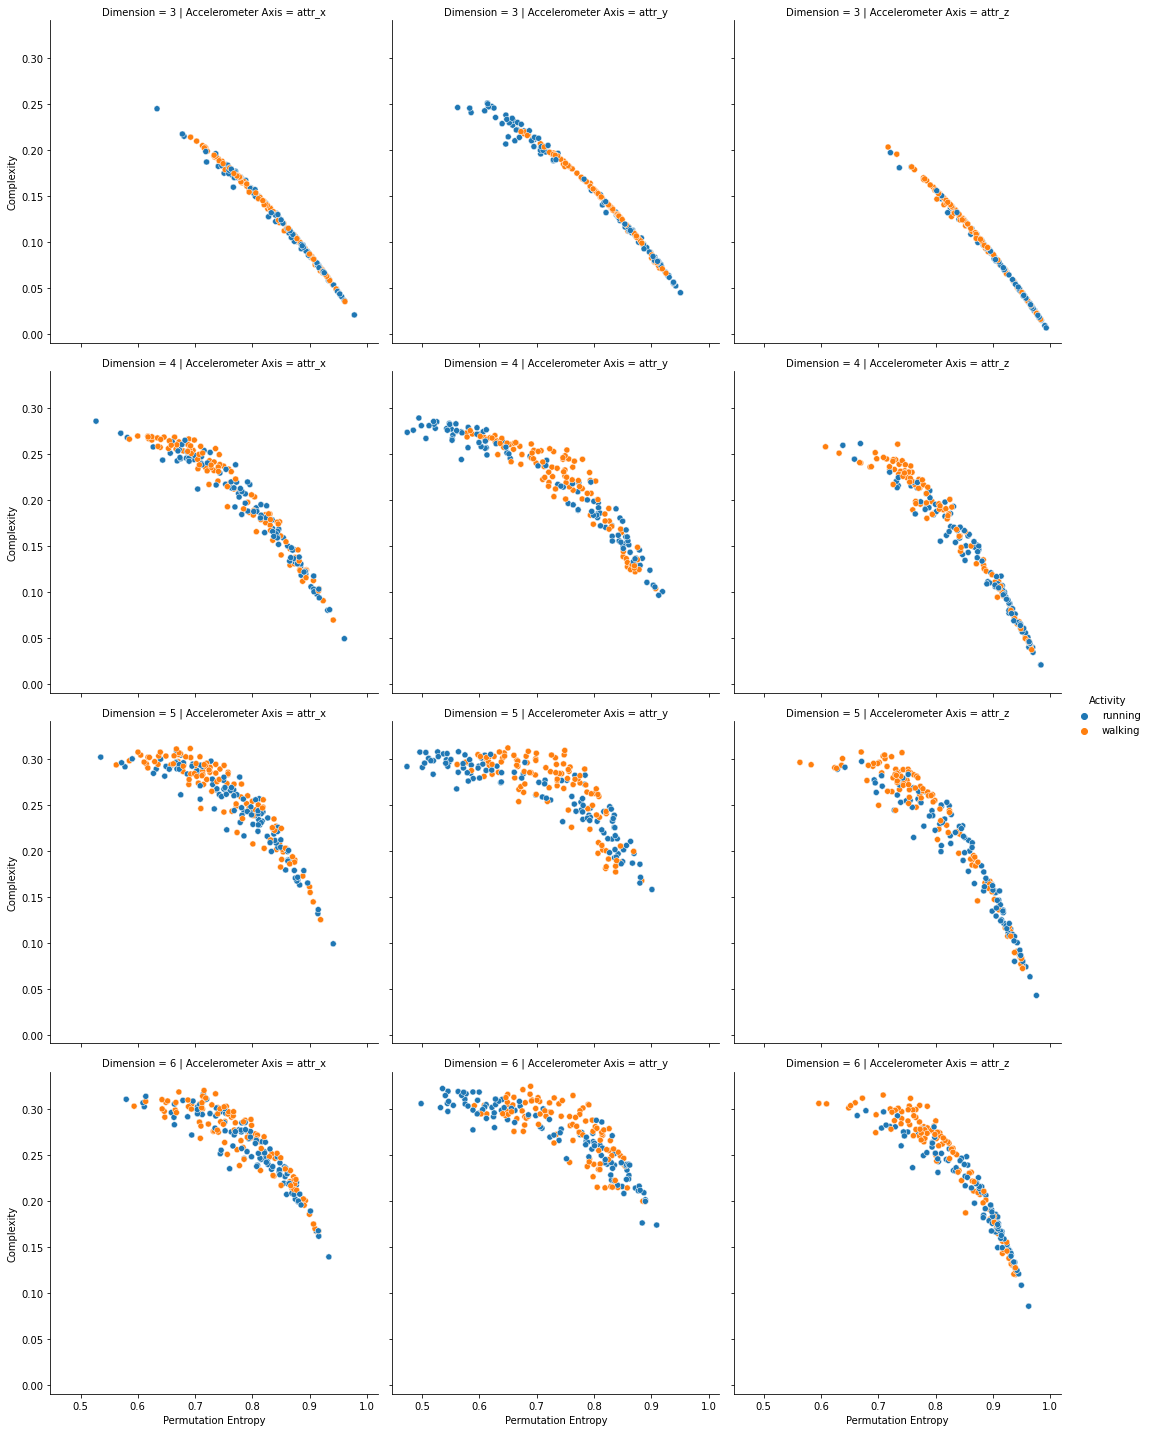

In [ ]:
# Scatter Plots for walking vs running with signal length 4096, delay 1, embedded dimensions in [3,4,5,6] and on x, y and z axes:
walking_running_df2 = df_main2[(df_main2['Activity']=='running') | (df_main2['Activity']=='walking')]
wrsd = walking_running_df2[(walking_running_df2['Signal Length']==4096) & (walking_running_df2['Delay']==1)]
sns.relplot(data=wrsd,x='Permutation Entropy',y='Complexity',hue='Activity',col='Accelerometer Axis',row='Dimension')
plt.show()

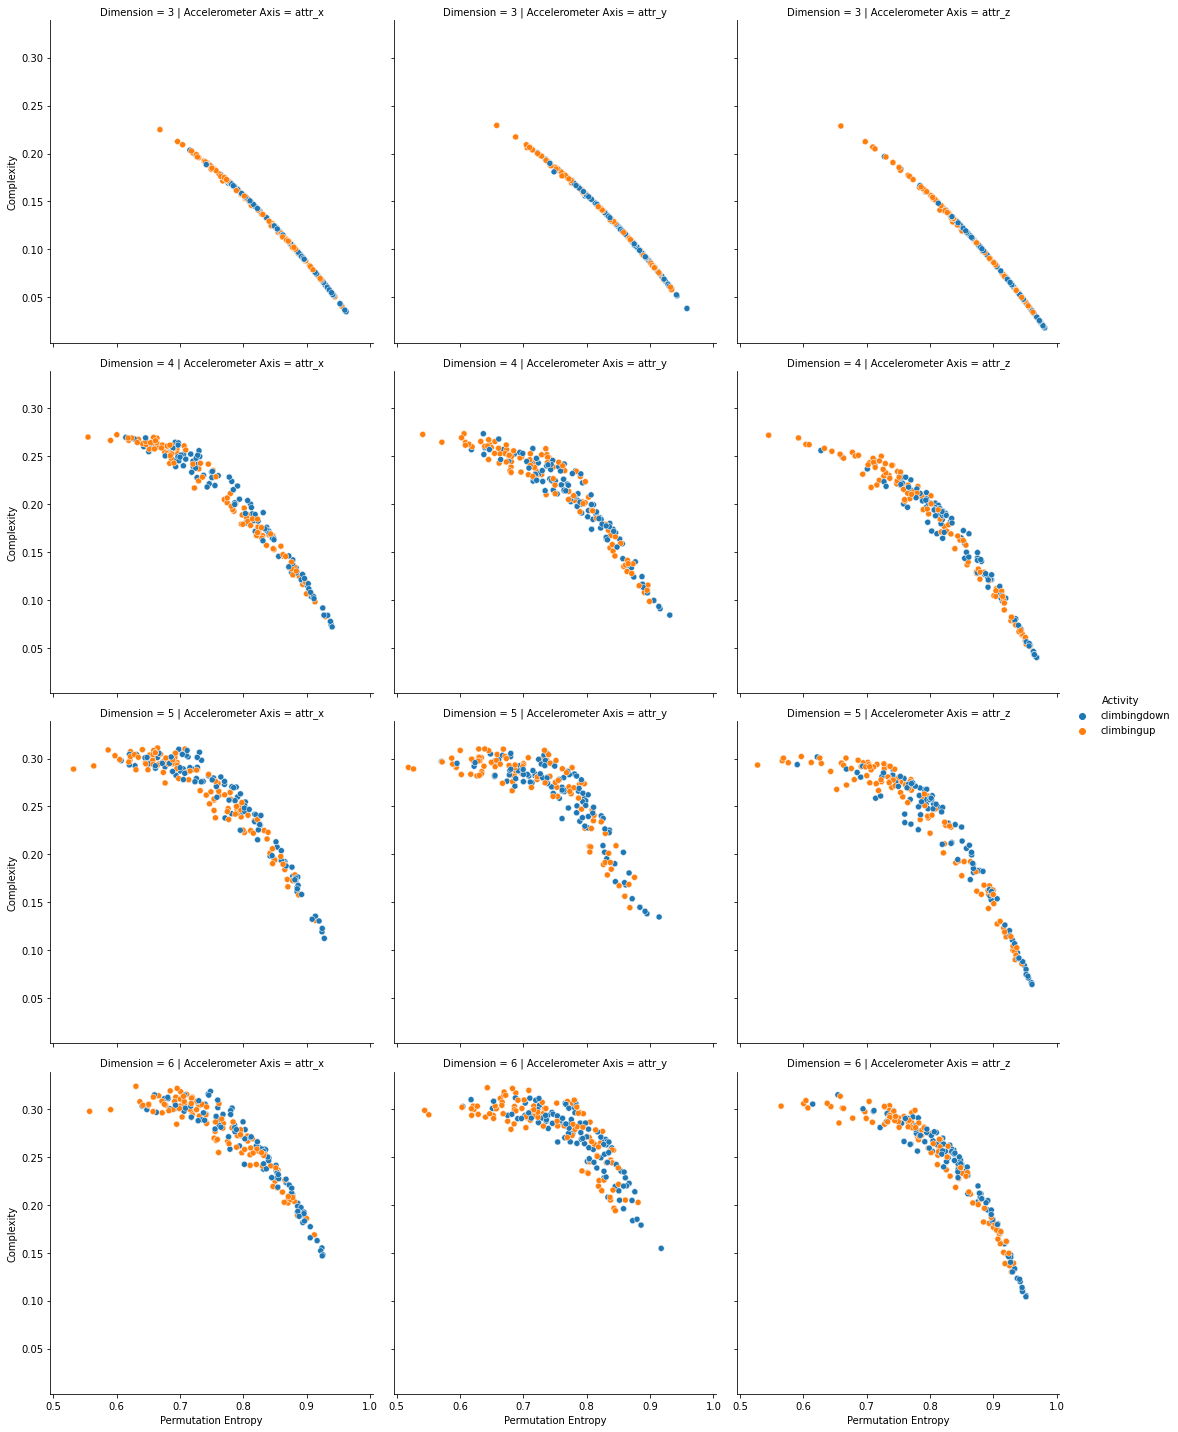

In [ ]:
# Scatter Plots for climbing up vs climbing down with signal length 4096, delay 1, embedded dimensions in [3,4,5,6] and on x, y and z axes:
climbing_updown_df2 = df_main2[(df_main2['Activity']=='climbingup') | (df_main2['Activity']=='climbingdown')]
udsd = climbing_updown_df2[(climbing_updown_df2['Signal Length']==4096) & (climbing_updown_df2['Delay']==1)]
sns.relplot(data=udsd,x='Permutation Entropy',y='Complexity',hue='Activity',col='Accelerometer Axis',row='Dimension')
plt.show()